# Perturbing TLEs


A recent question: how close does our initial tracking have to be in order to initially acquire the object of interest?  A foundational question here is how tight the errors on the TLE are.  To examine that, we can look at how TLEs change over time, then how that affects the track we expect to see on the sky.  Celestrak is kind enough to post historical archives of a bunch of TLE data for popular satellites; working from that archive, it should be possible to examine the historical changes, as well as seeing how they change things.

First up, let's set us up the observer (and load PyEphem):

In [2]:
%pylab inline

import ephem

qth = ephem.Observer()
qth.lat = np.deg2rad(37.7282)
qth.lon = np.deg2rad(-122.4070)
qth.elevation = 25

Populating the interactive namespace from numpy and matplotlib


Now, let's load up ISS and see what it looks like, as a quick sanity check.

In [3]:
hist_tle_dir = "3rdparty_data/historical_tles/"
f = file("%s/zarya.txt" % hist_tle_dir)
lines = f.readlines()
f.close()


len(lines)

20428

In [104]:
def load_history(path, nom=""):
    # Loads the history in path, returns an array of the elements and a list of the pyephem ojects
    f = file(path)
    lines = f.readlines()
    f.close()
    
    n = len(lines)/2
    a = np.zeros(n, dtype=[ (c,'f4') for c in "epoch drag inc raan e ap M n orbit".split()])
    
    objs = []
    
    for i in range(0, len(lines), 2):
        try:
            s = ephem.readtle(nom, lines[i], lines[i+1])
        except ValueError:
            print i
            print lines[i], lines[i+1]
            raise
        
        # in order from the TLE, less useful field omitted
        a[i/2] = (s._epoch, s._drag, s._inc, s._raan, s._e, s._ap, s._M, s._n, s._orbit)
        objs.append(s)

    return a, objs

(36117.785, 38351.473)

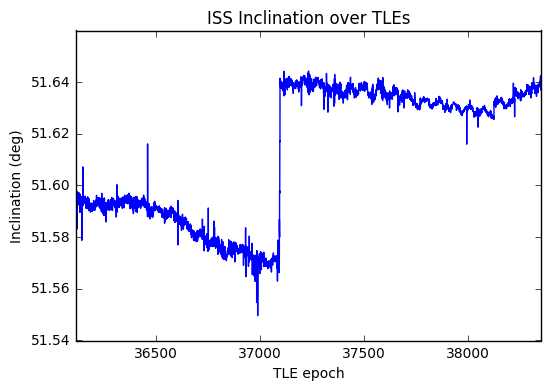

In [106]:
a_iss, objs_iss = load_history("3rdparty_data/historical_tles/zarya.txt", "zarya")

plot(a_iss["epoch"], np.rad2deg(a_iss["inc"]))
title("ISS Inclination over TLEs")
xlabel("TLE epoch")
ylabel("Inclination (deg)")
xlim(np.min(a_iss["epoch"]), np.max(a_iss["epoch"]))

Oh, hey, the ISS is still settling in at this point in history (this data is pretty old…).  Maybe it's better to use a spacecraft that's not literally under construction on-orbit.

6174

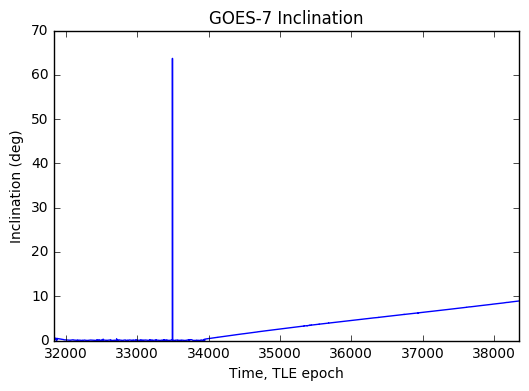

In [115]:
a_goes7, objs_goes7 = load_history("3rdparty_data/historical_tles/goes-7.txt", "GOES-7")

plot(a_goes7["epoch"], np.rad2deg(a_goes7["inc"]))
title("GOES-7 Inclination")
xlabel("Time, TLE epoch")
ylabel("Inclination (deg)")
xlim(np.min(a_goes7["epoch"]), np.max(a_goes7["epoch"]))
len(a_goes7)

Okay, well, that one's been maneuvered around, probably as part of tasking.  Maybe a ham radio satellite will work?  AO-51 is moderately venerable, and is basically a shiny box containing a repeater, so it's unlikely to maneuver on us.

(98, 99)

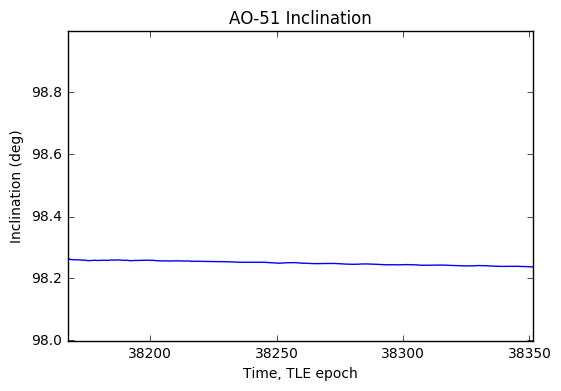

In [116]:
a_ao51, objs_ao51 = load_history("3rdparty_data/historical_tles/ao-51.txt", "AO-51")

plot(a_ao51["epoch"], np.rad2deg(a_ao51["inc"]))
title("AO-51 Inclination")
xlabel("Time, TLE epoch")
ylabel("Inclination (deg)")
xlim(np.min(a_ao51["epoch"]), np.max(a_ao51["epoch"]))
ylim(98,99)

In [121]:
a_ao51.dtype.names

('epoch', 'drag', 'inc', 'raan', 'e', 'ap', 'M', 'n', 'orbit')

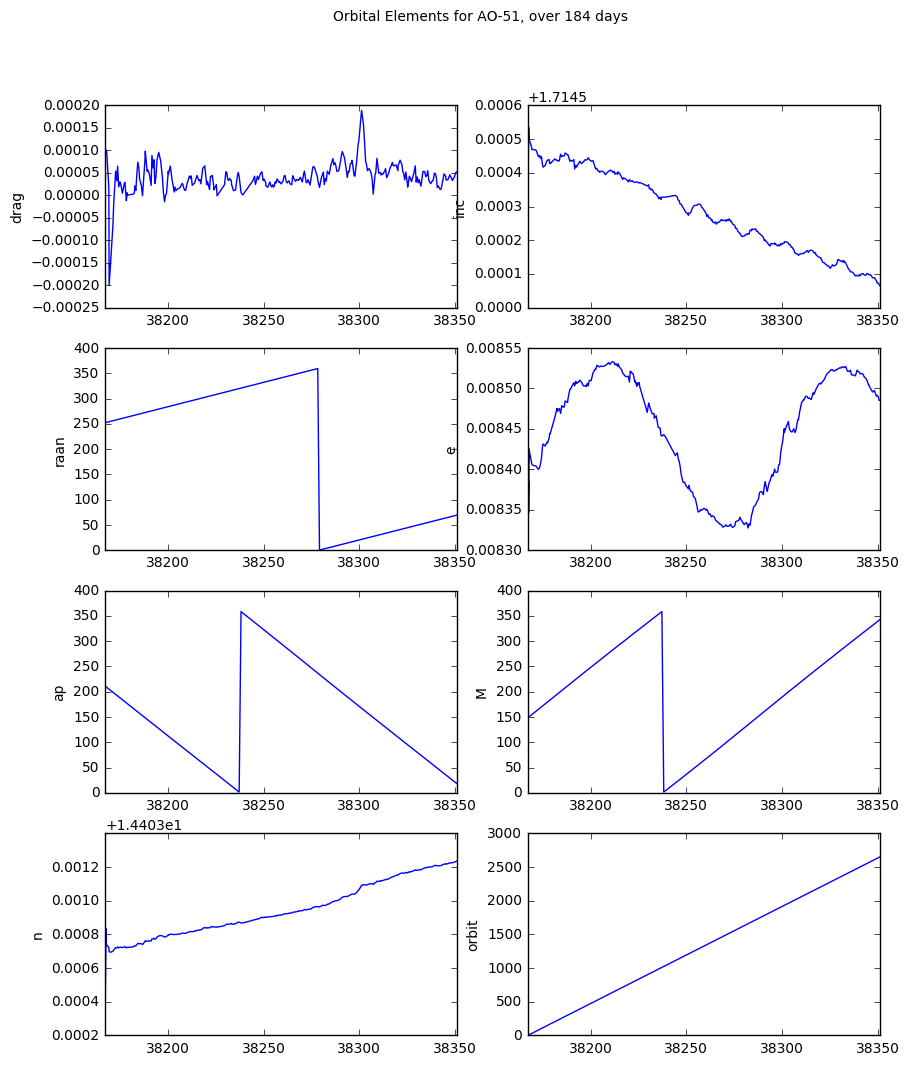

In [135]:
figure(figsize=(10,12))

e0,e1 = np.min(a_ao51["epoch"]), np.max(a_ao51["epoch"])

radfields = ["raan", "M", "ap"]

for i in range(8):
    nom = a_ao51.dtype.names[i+1]
    subplot(4,2,i+1)
    ylabel(nom)
    d = a_ao51[nom]
    if nom in radfields:
        d = np.rad2deg(d)
    plot(a_ao51["epoch"], d)
    xlim(e0,e1)
    
suptitle("Orbital Elements for AO-51, over %d days" % (e1-e0))

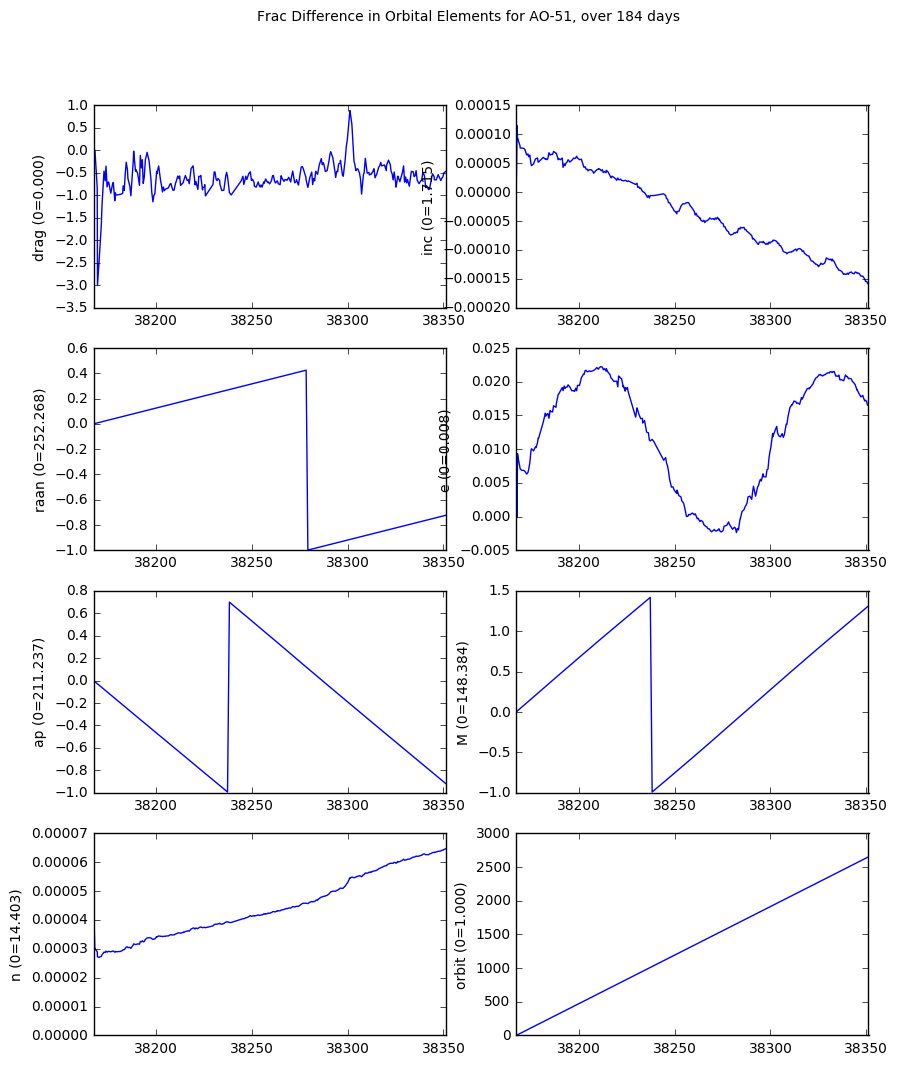

In [140]:
figure(figsize=(10,12))

e0,e1 = np.min(a_ao51["epoch"]), np.max(a_ao51["epoch"])

radfields = ["raan", "M", "ap"]

for i in range(8):
    nom = a_ao51.dtype.names[i+1]
    subplot(4,2,i+1)
    d = a_ao51[nom]
    if nom in radfields:
        d = np.rad2deg(d)
        
    ylabel("%s (0=%0.3f)" % (nom, d[0]))

    plot(a_ao51["epoch"],(d/d[0]-1.0))
    xlim(e0,e1)
    
suptitle("Frac Difference in Orbital Elements for AO-51, over %d days" % (e1-e0))